# 03 -- Digits MNIST - TensorFlow

## Victor Jose Novaes Pires

### 2019-03-14

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [4]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [5]:
from pandas import __version__

print(f"Pandas version: {__version__}")

Pandas version: 0.24.2


In [6]:
from seaborn import __version__

print(f"Seaborn version: {__version__}")

Seaborn version: 0.9.0


In [7]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.3


In [8]:
from tensorflow import __version__

print(f"TensorFlow version: {__version__}")

TensorFlow version: 1.12.0


In [9]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0


## Digits MNIST dataset

In [10]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Flattening

In [11]:
import numpy as np

X_train = np.asarray([X.flatten() for X in X_train])

X_train.shape

(60000, 784)

In [12]:
X_test = np.asarray([X.flatten() for X in X_test])

X_test.shape

(10000, 784)

### Categorization

In [13]:
classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
num_classes = len(classes)

num_classes

10

In [15]:
from keras.utils import to_categorical

y_train_c = to_categorical(y_train, num_classes)

y_train_c.shape

(60000, 10)

In [16]:
y_train_c[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
y_test_c = to_categorical(y_test, num_classes)

y_test_c.shape

(10000, 10)

### Feature scaling

In [18]:
X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [19]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [20]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

### Dataset analysis and equations on: 01 -- Digits MNIST - NumPy

## TensorFlow graph

In [21]:
import tensorflow as tf

input_size = X_train.shape[1]

X = tf.placeholder(tf.float32, shape=[None, input_size])

X

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>

In [22]:
hidden_layer_size = 25

Θ1 = tf.Variable(tf.random.uniform([input_size, hidden_layer_size], seed=42),
                 dtype=tf.float32)

Θ1 # Input weights

<tf.Variable 'Variable:0' shape=(784, 25) dtype=float32_ref>

In [23]:
b1 = tf.Variable(tf.zeros(hidden_layer_size), dtype=tf.float32)

b1 # Input bias

<tf.Variable 'Variable_1:0' shape=(25,) dtype=float32_ref>

In [24]:
z1 = tf.matmul(X, Θ1) + b1

z1 # Input layer

<tf.Tensor 'add:0' shape=(?, 25) dtype=float32>

In [25]:
a1 = tf.math.sigmoid(z1)

a1 # Input activation

<tf.Tensor 'Sigmoid:0' shape=(?, 25) dtype=float32>

In [26]:
Θ2 = tf.Variable(tf.random.uniform([hidden_layer_size, num_classes], seed=42),
                 dtype=tf.float32)

Θ2 # Output weights

<tf.Variable 'Variable_2:0' shape=(25, 10) dtype=float32_ref>

In [27]:
b2 = tf.Variable(tf.zeros(num_classes), dtype=tf.float32)

b2 # Output bias

<tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>

In [28]:
z2 = tf.matmul(a1, Θ2) + b2

z2 # Output layer

<tf.Tensor 'add_1:0' shape=(?, 10) dtype=float32>

In [29]:
y = tf.placeholder(tf.float32, shape=[None, num_classes])

y

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [30]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=z2))

loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

#### AdamOptimizer >> GradientDescentOptimizer

In [31]:
α = 0.1

# optimizer = tf.train.GradientDescentOptimizer(learning_rate=α)
optimizer = tf.train.AdamOptimizer(learning_rate=α)

optimizer

In [32]:
training = optimizer.minimize(loss)

training

<tf.Operation 'Adam' type=NoOp>

In [33]:
predictions = tf.argmax(z2, axis=1)

predictions

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [34]:
accuracy = tf.equal(predictions, tf.argmax(y, 1))

accuracy

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [35]:
accuracy_score = tf.reduce_mean(tf.cast(accuracy, tf.float32))

accuracy_score

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [36]:
init = tf.global_variables_initializer()

init

<tf.Operation 'init' type=NoOp>

In [37]:
np.random.seed(42)

def make_batch(X, y, batch_size):
    indices = np.random.choice(len(X), batch_size, replace=False)
    return X[indices], y[indices]


epochs = 3
iterations = 5_000 + 1
batch_size = 2**10

In [38]:
%%time

with tf.Session() as session:
    session.run(init)
    for epoch in range(epochs):
        print(f">>> Epoch: {epoch + 1}")
        for iteration in range(iterations):
            X_batch, y_batch = make_batch(X_train, y_train_c, batch_size)

            session.run(training, feed_dict={X: X_batch, y: y_batch})

            if (iteration%1_000 == 0):
                loss_val = loss.eval(feed_dict={X: X_batch, y: y_batch})
                print(f"Iteration: {iteration:5,d}\tLoss: {loss_val:.5f}")

        train_loss = loss.eval(feed_dict={X: X_train, y: y_train_c})
        train_acc = accuracy_score.eval(feed_dict={X: X_train,y: y_train_c})
        print(f"\nTrain loss: {train_loss:.5f}\tTrain accuracy: {100*train_acc:.2f}%")
        test_loss = loss.eval(feed_dict={X: X_test, y: y_test_c})
        test_acc = accuracy_score.eval(feed_dict={X: X_test, y: y_test_c})
        print(f"Test loss:  {test_loss:.5f}\tTest accuracy:  {100*test_acc:.2f}%")
        print('-'*50)

    p_train = predictions.eval(feed_dict={X: X_train})
    p_test = predictions.eval(feed_dict={X: X_test})

print()

>>> Epoch: 1
Iteration:     0	Loss: 3.42710
Iteration: 1,000	Loss: 0.37596
Iteration: 2,000	Loss: 0.38577
Iteration: 3,000	Loss: 0.31716
Iteration: 4,000	Loss: 0.36246
Iteration: 5,000	Loss: 0.31099

Train loss: 0.35068	Train accuracy: 89.93%
Test loss:  0.41165	Test accuracy:  88.78%
--------------------------------------------------
>>> Epoch: 2
Iteration:     0	Loss: 0.32143
Iteration: 1,000	Loss: 0.27467
Iteration: 2,000	Loss: 0.24006
Iteration: 3,000	Loss: 0.23511
Iteration: 4,000	Loss: 0.23640
Iteration: 5,000	Loss: 0.26625

Train loss: 0.26534	Train accuracy: 92.33%
Test loss:  0.33994	Test accuracy:  90.84%
--------------------------------------------------
>>> Epoch: 3
Iteration:     0	Loss: 0.24807
Iteration: 1,000	Loss: 0.24316
Iteration: 2,000	Loss: 0.24311
Iteration: 3,000	Loss: 0.25793
Iteration: 4,000	Loss: 0.23954
Iteration: 5,000	Loss: 0.19564

Train loss: 0.21176	Train accuracy: 93.95%
Test loss:  0.31749	Test accuracy:  91.77%
----------------------------------------

## Scores

### Training set

In [39]:
import NNfromScratch as nnfs

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 93.95%


In [40]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 56,372 out of 60,000 images.


In [41]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 3,628 out of 60,000 images.


### Test set

In [42]:
a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 91.77%


In [43]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 9,177 out of 10,000 images.


In [44]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 823 out of 10,000 images.


## Distribution of labels

In [45]:
import pandas as pd

df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])
df['Pred Train'] = np.bincount(p_train.reshape(-1))
df['Train Diff'] = df['Pred Train'] - df['Y Train']
df['Y Test'] = np.bincount(y_test.reshape(-1))
df['Pred Test'] = np.bincount(p_test.reshape(-1))
df['Test Diff'] = df['Pred Test'] - df['Y Test']
df['Y Combined'] = df['Y Train'] + df['Y Test']
df['Pred Combined'] = df['Pred Train'] + df['Pred Test']
df['Combined Diff'] = df['Pred Combined'] - df['Y Combined']
df.index.set_names('Labels', inplace=True)
df

,Y Train,Pred Train,Train Diff,Y Test,Pred Test,Test Diff,Y Combined,Pred Combined,Combined Diff
Labels,,,,,,,,,
0,5923,5838,-85,980,984,4,6903,6822,-81
1,6742,6662,-80,1135,1128,-7,7877,7790,-87
2,5958,6177,219,1032,1059,27,6990,7236,246
3,6131,5771,-360,1010,971,-39,7141,6742,-399
4,5842,5767,-75,982,982,0,6824,6749,-75
5,5421,5519,98,892,917,25,6313,6436,123
6,5918,5982,64,958,974,16,6876,6956,80
7,6265,6240,-25,1028,1004,-24,7293,7244,-49
8,5851,5972,121,974,962,-12,6825,6934,109


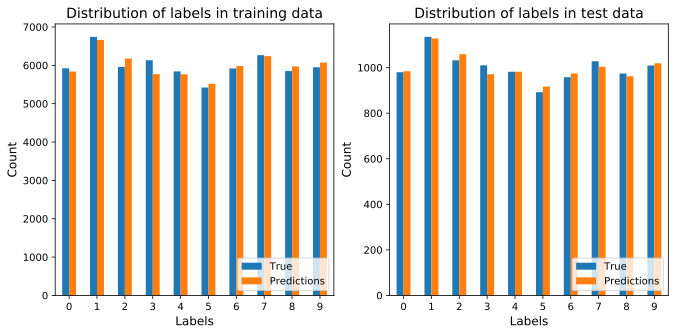

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

df[['Y Train', 'Pred Train']].plot.bar(ax=axes[0], rot=0)
axes[0].set_title("Distribution of labels in training data", fontsize=14)
axes[0].set_xlabel("Labels", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(['True', 'Predictions'], loc='lower right')

df[['Y Test', 'Pred Test']].plot.bar(ax=axes[1], rot=0)
axes[1].set_title("Distribution of labels in test data", fontsize=14)
axes[1].set_xlabel("Labels", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(['True', 'Predictions'], loc='lower right')

plt.show()

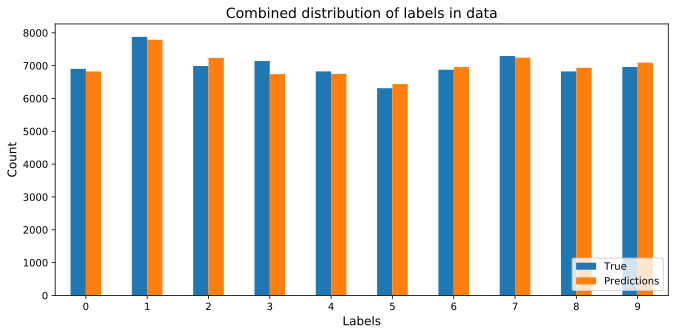

In [47]:
df[['Y Combined', 'Pred Combined']].plot.bar(figsize=(11, 5), rot=0)
plt.title("Combined distribution of labels in data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(['True', 'Predictions'], loc='lower right')
plt.show()

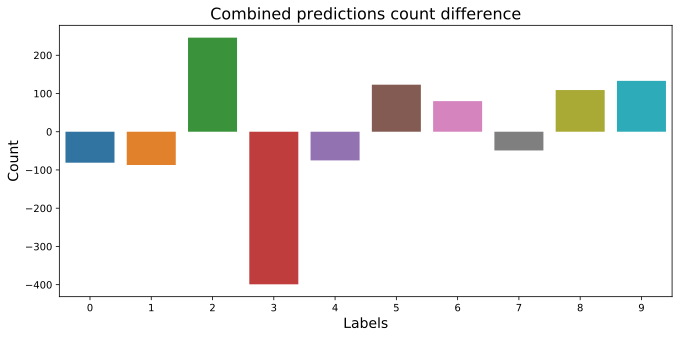

In [48]:
import seaborn as sns

plt.figure(figsize=[11, 5])
sns.barplot(data=df[['Combined Diff']].T)
plt.title("Combined predictions count difference", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

## Correctly classified images

In [49]:
def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {y[indices[i]]} <> Pred: {p[indices[i]]}", fontsize=12)
        ax.set_axis_off()

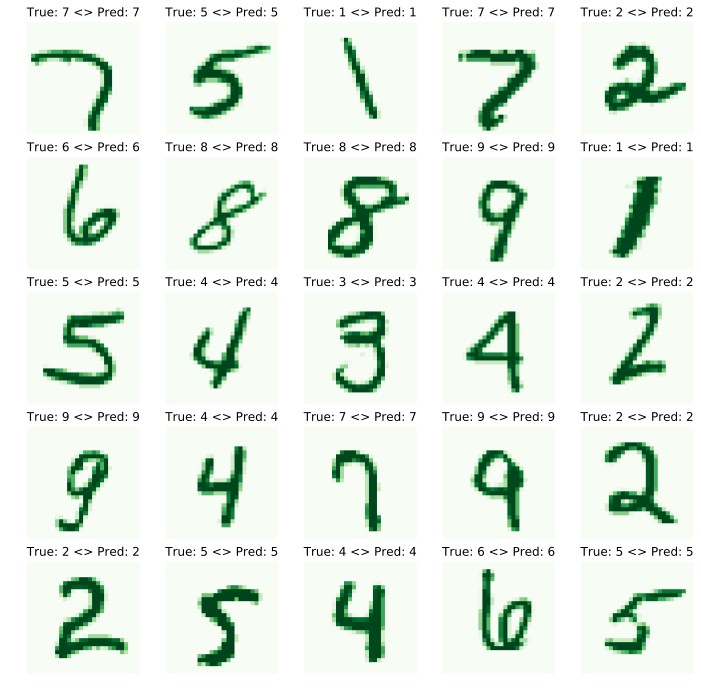

In [50]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

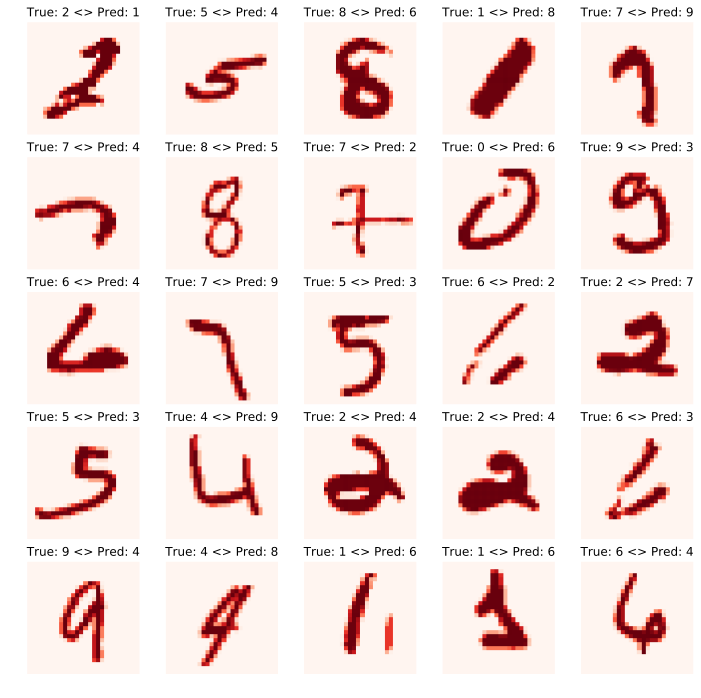

In [51]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')